In [1]:
import numpy as np 
import pandas as pd 

import os

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg

C:\Users\91877\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [13]:
DISPLAY_DATASET_PATH = r'C:\Users\91877\Downloads\archive (4)'
DATASET_PATH = r'C:\Users\91877\Downloads\archive (4)'
print(os.listdir(DATASET_PATH))

['images', 'myntradataset']


In [ ]:
import pandas as pd

# Specify the path to your Excel file
excel_file_path = 'your_file.xlsx'

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(excel_file_path)

In [16]:
df = pd.read_csv( "styles.csv", nrows=15000, on_bad_lines="skip")
# df = pd.read_csv(DATASET_PATH + "styles.csv", on_bad_lines="skip")
print(df.shape)
df.head()

(15000, 10)


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt


In [20]:
%%time
import os

def get_all_filenames(directory):
    """
    Returns a set of all filenames in the given directory.
    """
    filenames = {entry.name for entry in os.scandir(directory) if entry.is_file()}
    return filenames

images = get_all_filenames(r'C:\Users\91877\Downloads\archive (4)\images')

CPU times: total: 31.2 ms
Wall time: 49.6 ms


In [21]:
def check_image_exists(image_filename):
    """
    Checks if the desired filename exists within the filenames found in the given directory.
    Returns True if the filename exists, False otherwise.
    """
    global images
    if image_filename in images:
        return image_filename
    else:
        return np.nan

df['image'] = df["id"].apply(lambda image: check_image_exists(str(image) + ".jpg"))
df = df.reset_index(drop=True)
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt,53759.jpg


In [22]:
df.isna().sum()


id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour              4
season                  6
year                    0
usage                 101
productDisplayName      2
image                   1
dtype: int64

In [23]:
df = df.dropna(subset=['image'])

In [25]:
df.shape

(14999, 11)

In [28]:
import cv2
def plot_figures(figures, nrows = 1, ncols=1,figsize=(8, 8)):
    """Plot a dictionary of figures.

    Parameters
    ----------
    figures : <title, figure> dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows,figsize=figsize)
    for ind,title in enumerate(figures):
        axeslist.ravel()[ind].imshow(cv2.cvtColor(figures[title], cv2.COLOR_BGR2RGB))
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout() # optional
    
def img_path(img,display=False):
    if display :
        return DISPLAY_DATASET_PATH+"/images/"+img
    else :
        return DATASET_PATH+"/images/"+img

def load_image(img,display=False):
    return cv2.imread(img_path(img,display))

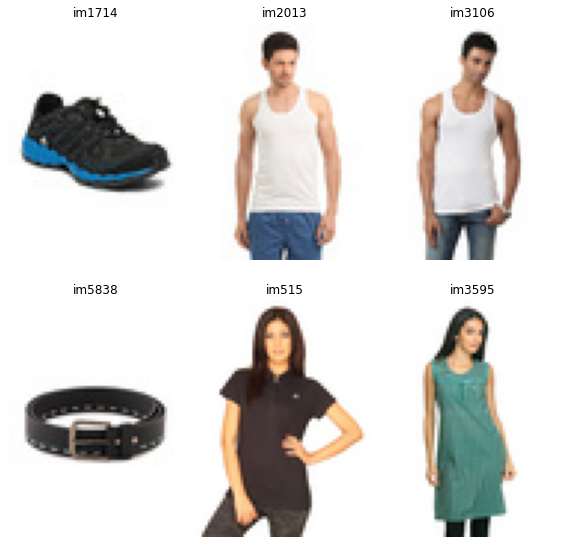

In [29]:
# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image,True) for i, row in df.sample(6).iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

<AxesSubplot:>

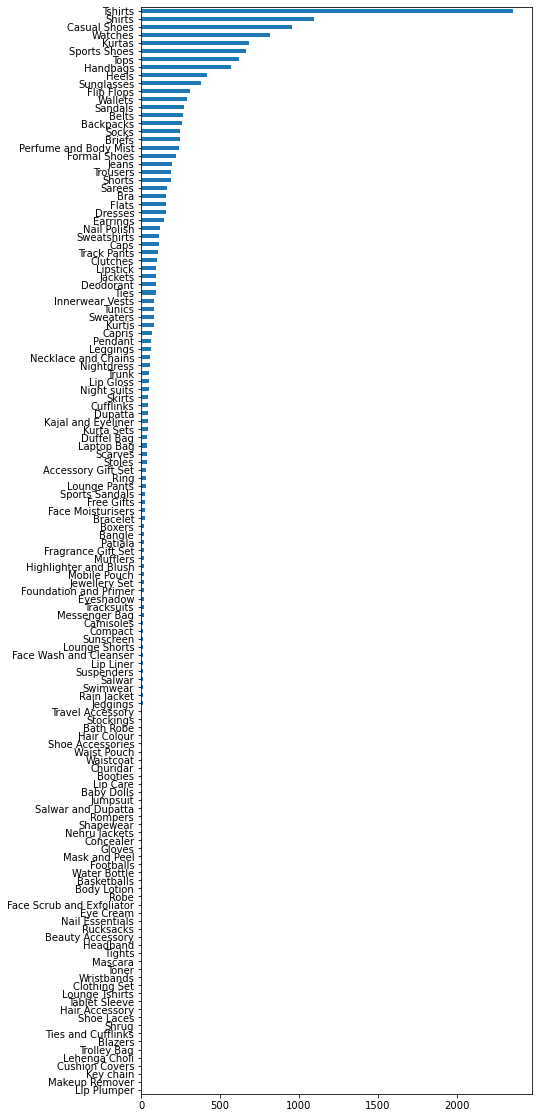

In [30]:
plt.figure(figsize=(7,20))
df.articleType.value_counts().sort_values().plot(kind='barh')